In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Load data
df = pd.read_csv('data/gym_members_exercise_tracking.csv')
df2 = pd.read_csv('data/gym_membership.csv')
df3 = pd.read_csv("data/gym_churn_us.csv")
df4 = pd.read_csv("data/megaGymDataset.csv")

In [38]:
# Data Summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [39]:
# Data Summary
print(df2.info())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1000 non-null   int64 
 1   gender                 1000 non-null   object
 2   birthday               1000 non-null   object
 3   Age                    1000 non-null   int64 
 4   abonoment_type         1000 non-null   object
 5   visit_per_week         1000 non-null   int64 
 6   days_per_week          1000 non-null   object
 7   attend_group_lesson    1000 non-null   bool  
 8   fav_group_lesson       503 non-null    object
 9   avg_time_check_in      1000 non-null   object
 10  avg_time_check_out     1000 non-null   object
 11  avg_time_in_gym        1000 non-null   int64 
 12  drink_abo              1000 non-null   bool  
 13  fav_drink              496 non-null    object
 14  personal_training      1000 non-null   bool  
 15  name_personal_trainer 

In [40]:
# Data Summary
print(df3.info())
print(df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [41]:
# Data Summary
print(df4.info())
print(df4.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2886 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB
None
        Unnamed: 0       Rating
count  2918.000000  1031.000000
mean   1458.500000     5.919690
std     842.498368     3.584607
min       0.000000     0.000000
25%     729.250000     3.000000
50%    1458.500000     7.900000
75%    2187.750000     8.700000
max    2917.000000     9.600000


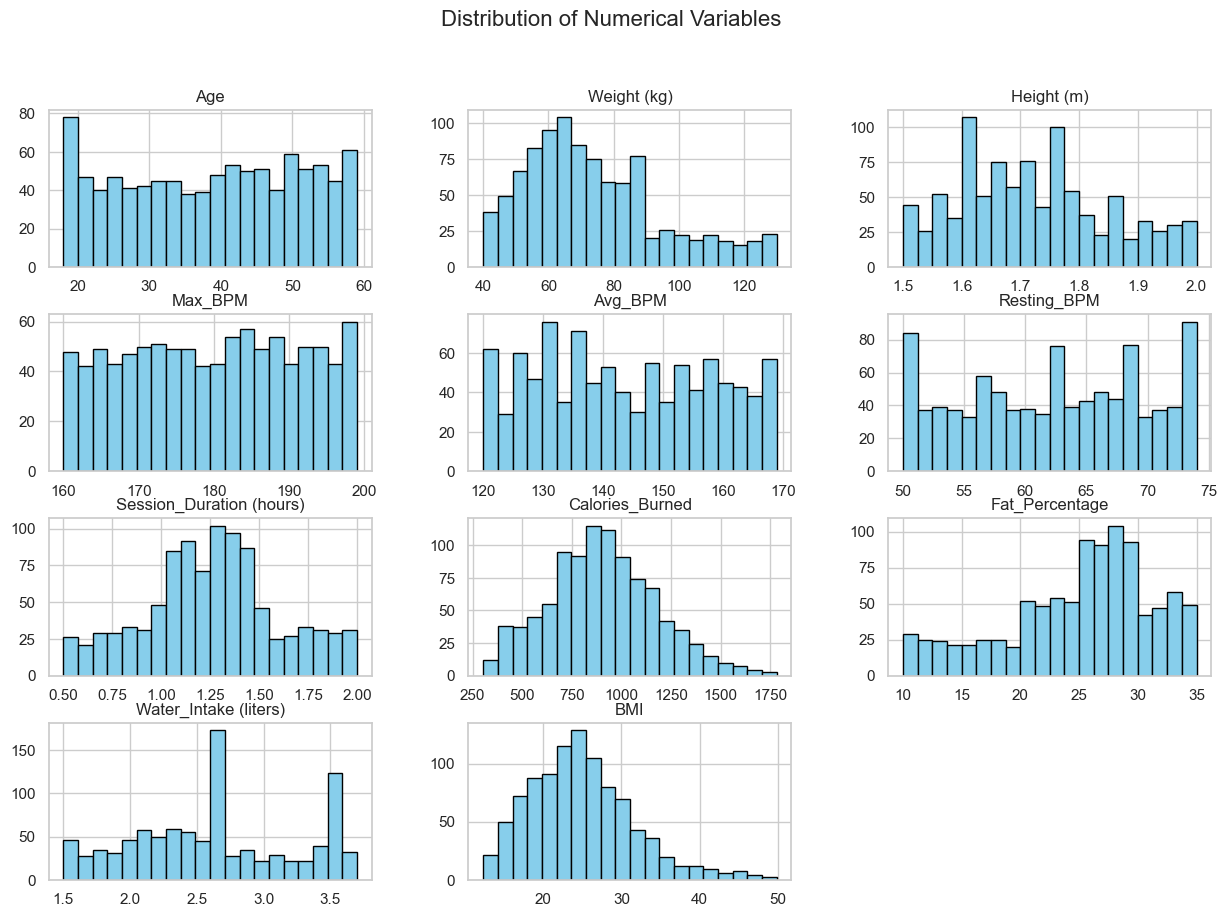

In [42]:
# 1. Basic Statistics and Distribution of Numerical Variables: 

# Check distributions of numerical columns
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                   'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 
                   'Fat_Percentage', 'Water_Intake (liters)', 'BMI']

# Plot histograms for each numerical column
df[numeric_columns].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

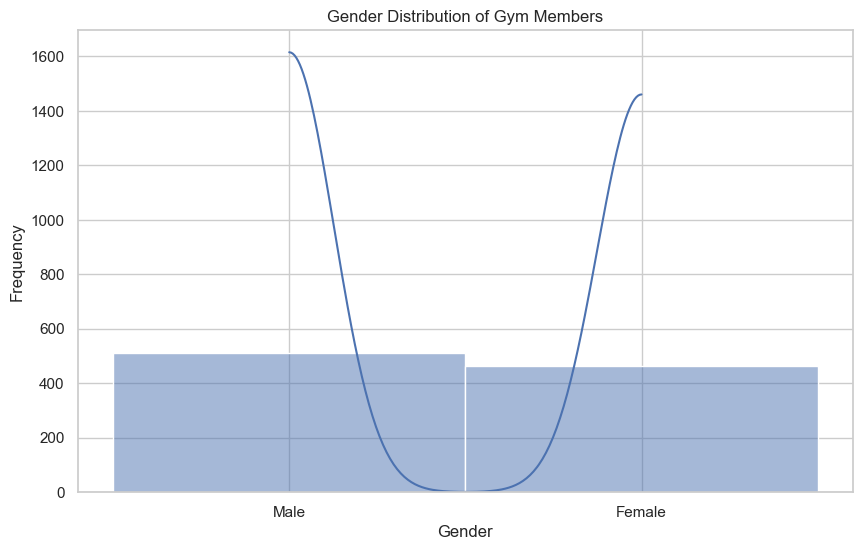

In [43]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Gender'], bins=15, kde=True)
plt.title('Gender Distribution of Gym Members')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

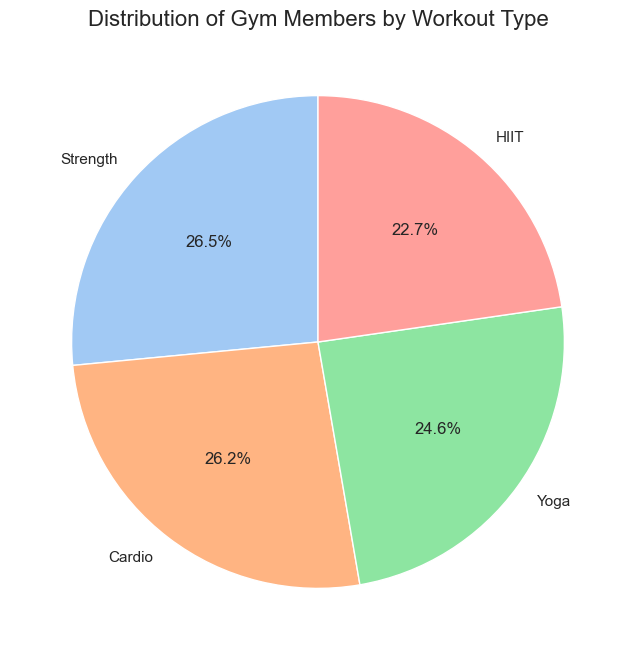

In [44]:
# Pie chart of workout types
plt.figure(figsize=(8, 8))
workout_counts = df['Workout_Type'].value_counts()
workout_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops=dict(edgecolor='white')
)
plt.title("Distribution of Gym Members by Workout Type", fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.show()

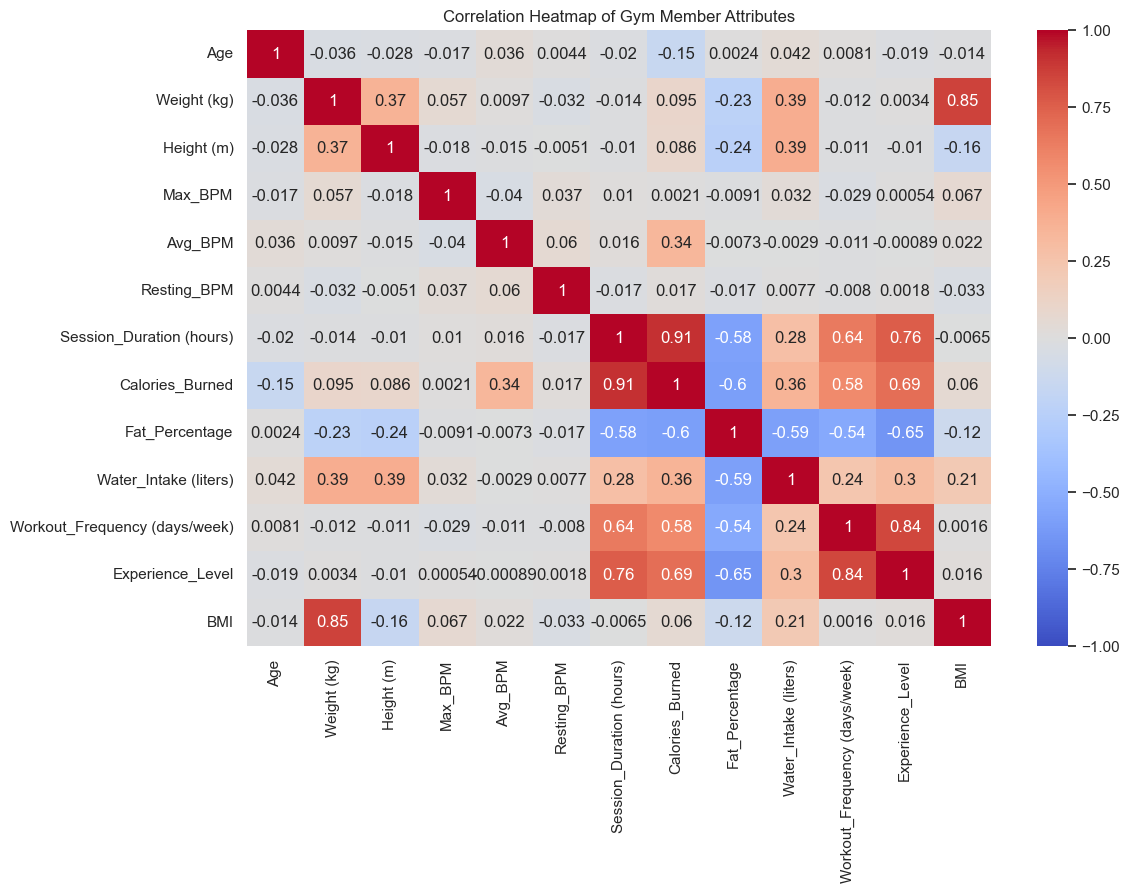

In [45]:
#2. Correlation Analysis: 

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plotting the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Gym Member Attributes")
plt.show()


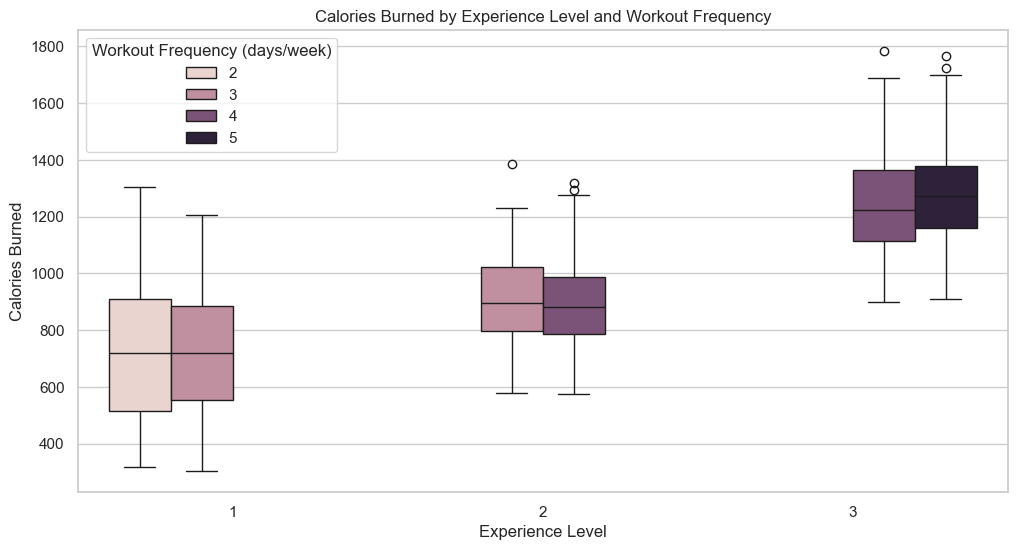

In [46]:
# 3. Workout Frequency Analysis: 

# Calories burned by experience level and workout frequency
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned', hue='Workout_Frequency (days/week)')
plt.title("Calories Burned by Experience Level and Workout Frequency")
plt.xlabel("Experience Level")
plt.ylabel("Calories Burned")
plt.legend(title='Workout Frequency (days/week)')
plt.show()

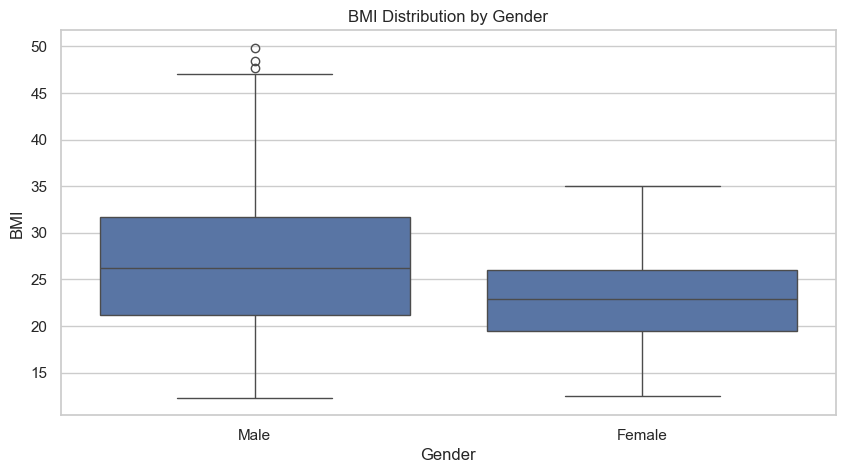

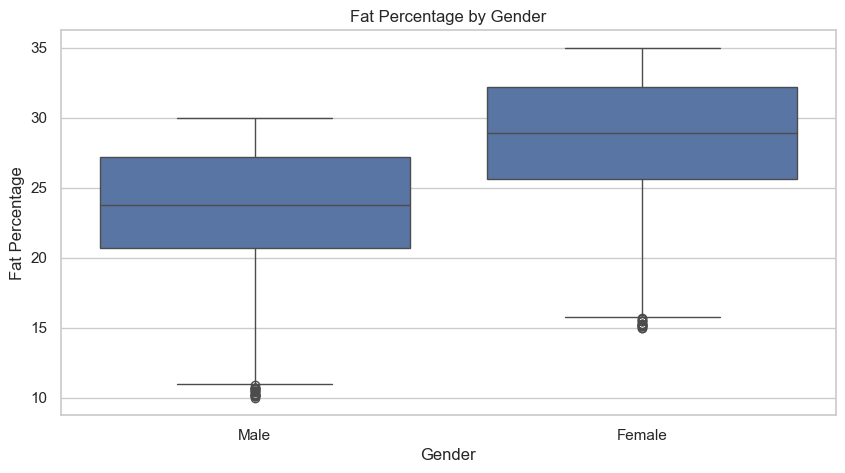

In [47]:
# 4. Gender-Based Analysis:

# BMI comparison by gender
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender', y='BMI')
plt.title("BMI Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

# Fat Percentage comparison by gender
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender', y='Fat_Percentage')
plt.title("Fat Percentage by Gender")
plt.xlabel("Gender")
plt.ylabel("Fat Percentage")
plt.show()


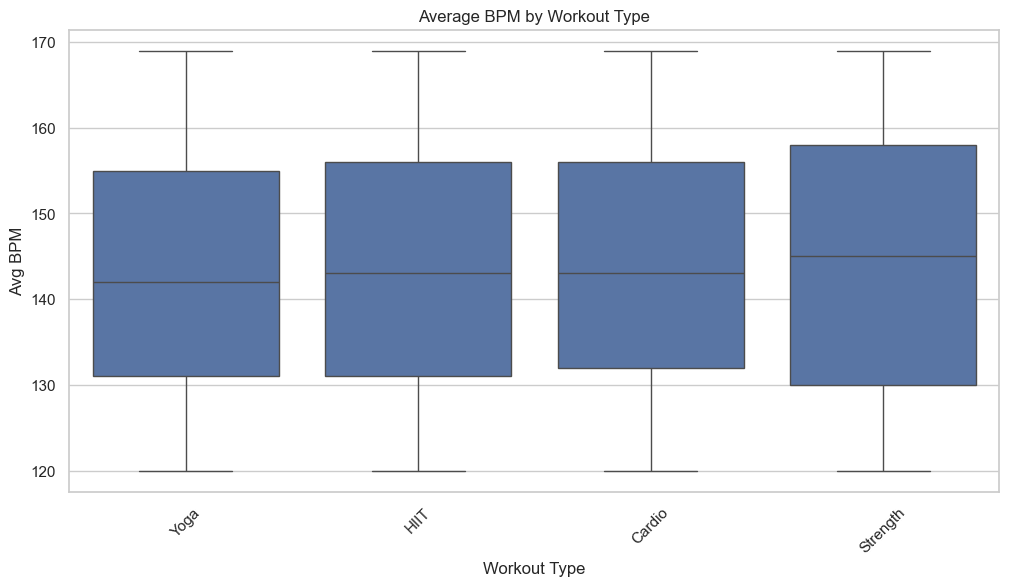

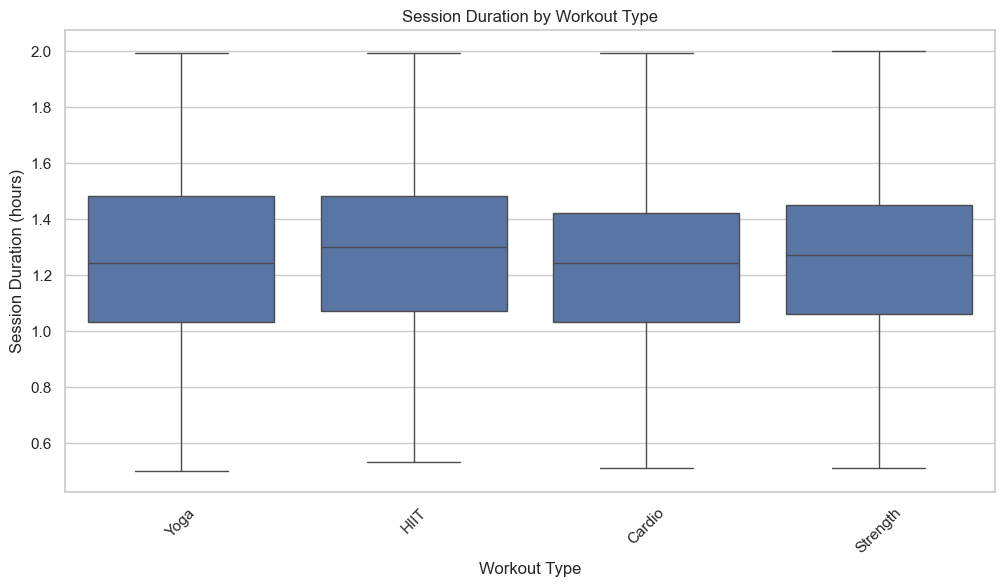

In [48]:
# 5. Workout Type Analysis

# Avg BPM by Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Workout_Type', y='Avg_BPM')
plt.title("Average BPM by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Avg BPM")
plt.xticks(rotation=45)
plt.show()

# Session duration by Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Workout_Type', y='Session_Duration (hours)')
plt.title("Session Duration by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Session Duration (hours)")
plt.xticks(rotation=45)
plt.show()


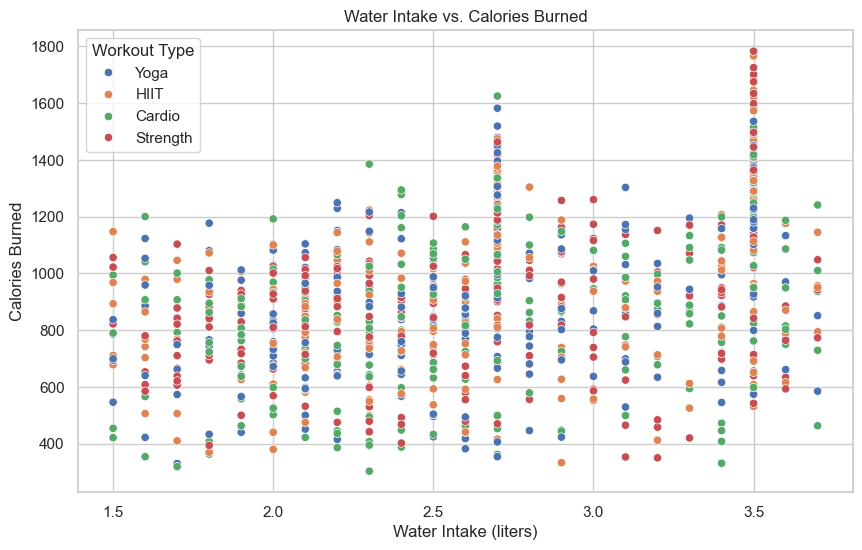

In [49]:
# 6. Analysis of Water Intake

# Scatter plot for Water Intake and Calories Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Water_Intake (liters)', y='Calories_Burned', hue='Workout_Type')
plt.title("Water Intake vs. Calories Burned")
plt.xlabel("Water Intake (liters)")
plt.ylabel("Calories Burned")
plt.legend(title="Workout Type")
plt.show()


C:\Users\mikel\AppData\Local\Temp\ipykernel_21476\2421426728.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y='Age', palette='viridis')


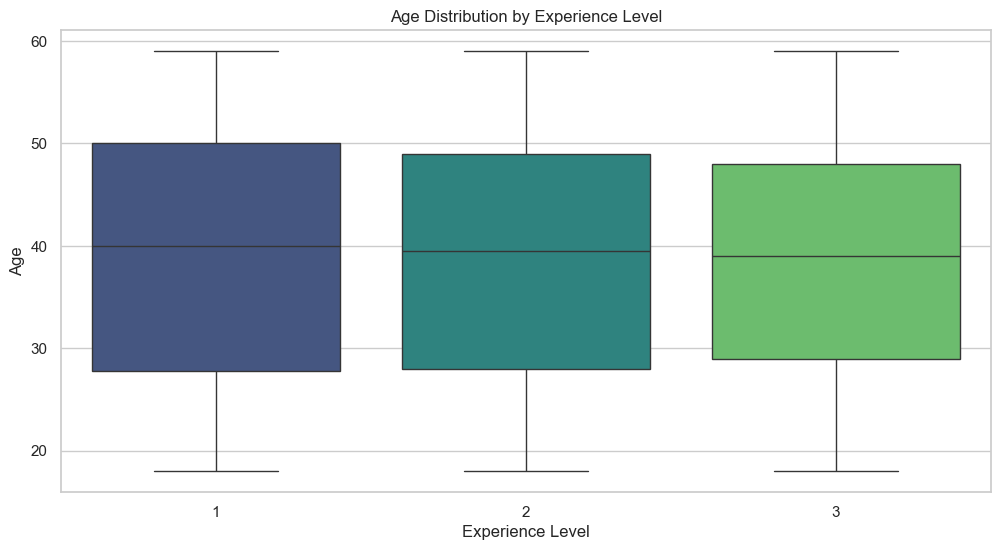

In [50]:
# 7. Age Distribution by Experience Level

# Age distribution by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Experience_Level', y='Age', palette='viridis')
plt.title("Age Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Age")
plt.show()

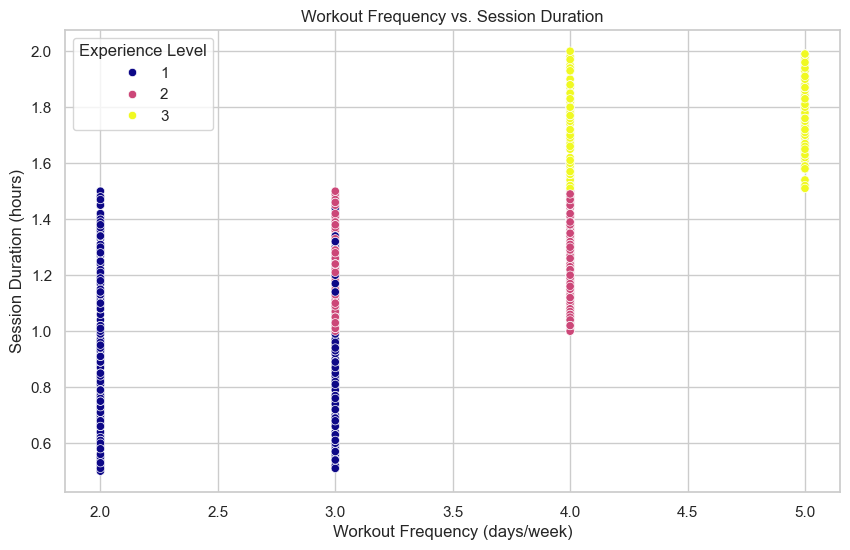

In [51]:
# 8. Session Duration vs. Workout Frequency:

# Scatter plot for Session Duration and Workout Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Workout_Frequency (days/week)', y='Session_Duration (hours)', hue='Experience_Level', palette='plasma')
plt.title("Workout Frequency vs. Session Duration")
plt.xlabel("Workout Frequency (days/week)")
plt.ylabel("Session Duration (hours)")
plt.legend(title="Experience Level")
plt.show()

In [52]:
# 9. Statistical Summary of Key Variables by Experience Level

# Group by Experience Level for a summary
experience_summary = df.groupby('Experience_Level').agg({
    'Age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Calories_Burned': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std'],
    'Session_Duration (hours)': ['mean', 'std']
})

# Display the summary
print(experience_summary)


                        Age                   BMI           Calories_Burned  \
                       mean        std       mean       std            mean   
Experience_Level                                                              
1                 38.917553  12.266425  24.624362  6.982564      726.375000   
2                 38.652709  12.308988  25.256034  7.342699      901.918719   
3                 38.287958  11.783834  24.747592  3.921239     1265.340314   

                             Fat_Percentage            \
                         std           mean       std   
Experience_Level                                        
1                 227.343301      27.634574  3.864288   
2                 152.645367      27.307389  3.896842   
3                 186.834501      14.790576  2.950649   

                 Session_Duration (hours)            
                                     mean       std  
Experience_Level                                     
1                   

C:\Users\mikel\AppData\Local\Temp\ipykernel_21476\1363659374.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
C:\Users\mikel\AppData\Local\Temp\ipykernel_21476\1363659374.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
C:\Users\mikel\AppData\Local\Temp\ipykernel_21476\1363659374.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Experience_Level', y=var, ax=axes[row, co

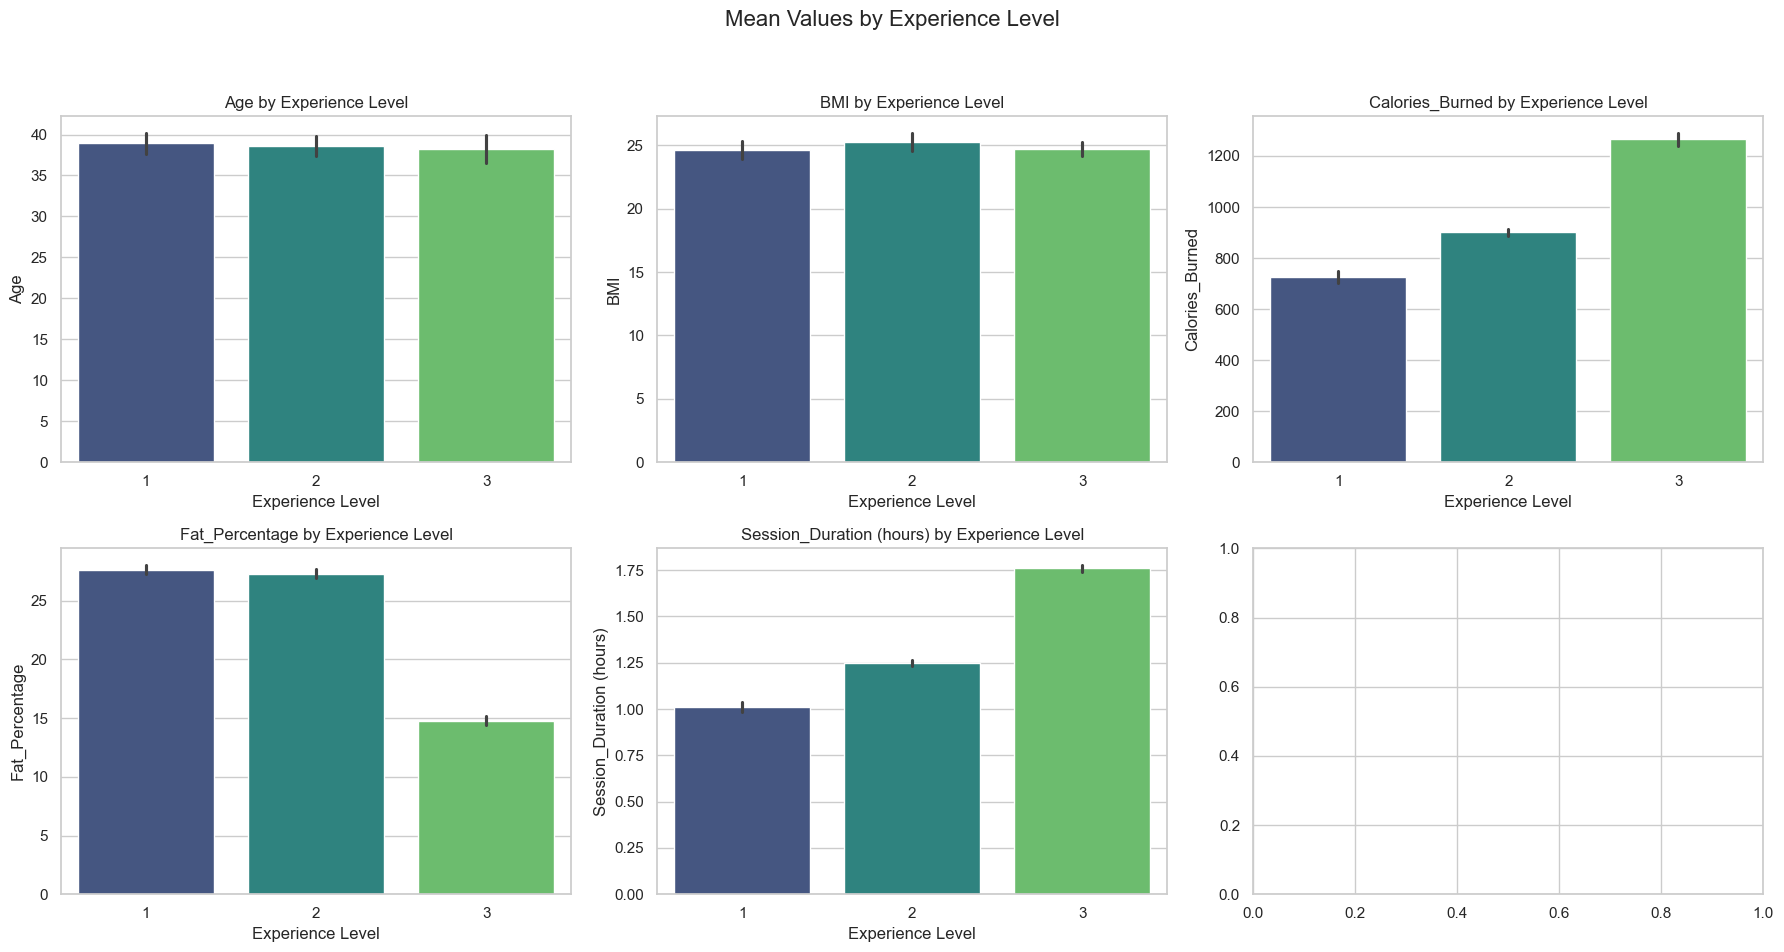

In [53]:
# 9.1. Bar Plots for Mean Values by Experience Level:

# Set plot style
sns.set(style="whitegrid")

# Plot each variable by Experience_Level
variables = ['Age', 'BMI', 'Calories_Burned', 'Fat_Percentage', 'Session_Duration (hours)']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Mean Values by Experience Level", fontsize=16)

# Loop over each variable to create bar plots
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.barplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
    axes[row, col].set_title(f"{var} by Experience Level")
    axes[row, col].set_xlabel("Experience Level")
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



C:\Users\mikel\AppData\Local\Temp\ipykernel_21476\2728323590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
C:\Users\mikel\AppData\Local\Temp\ipykernel_21476\2728323590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
C:\Users\mikel\AppData\Local\Temp\ipykernel_21476\2728323590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y=var, ax=axes[row, 

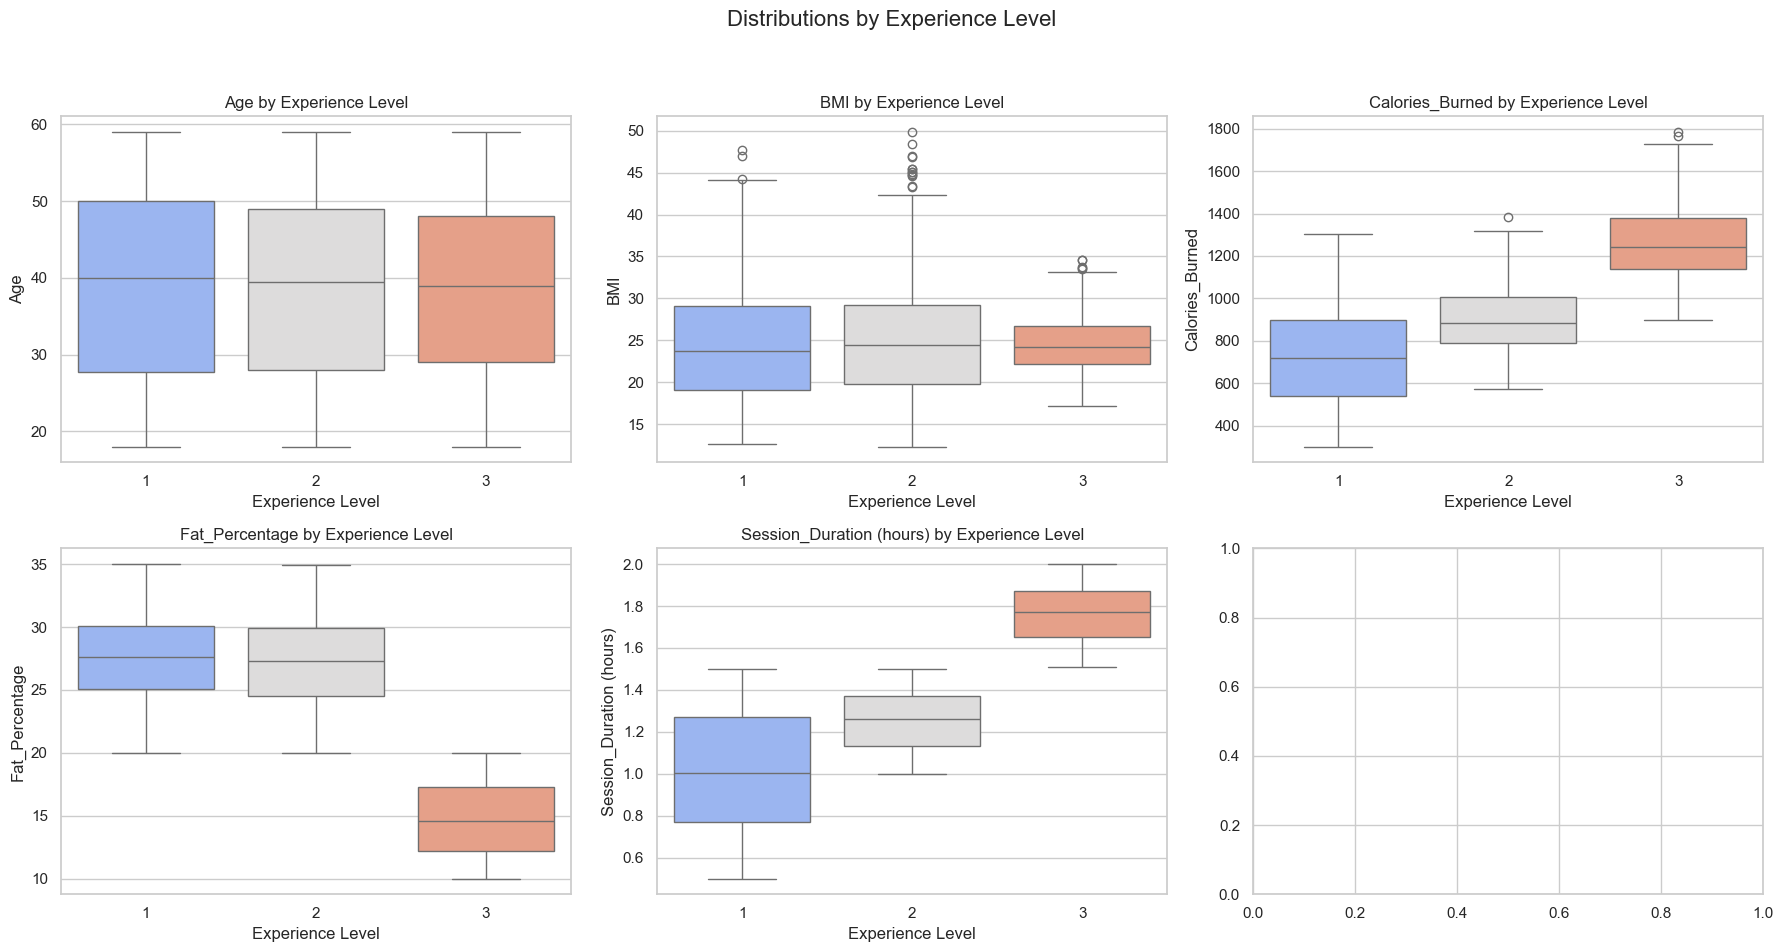

In [54]:
# 9.2. Box Plots for Distributions by Experience Level:

# Plot each variable by Experience_Level using box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distributions by Experience Level", fontsize=16)

# Loop over each variable to create box plots
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.boxplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
    axes[row, col].set_title(f"{var} by Experience Level")
    axes[row, col].set_xlabel("Experience Level")
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

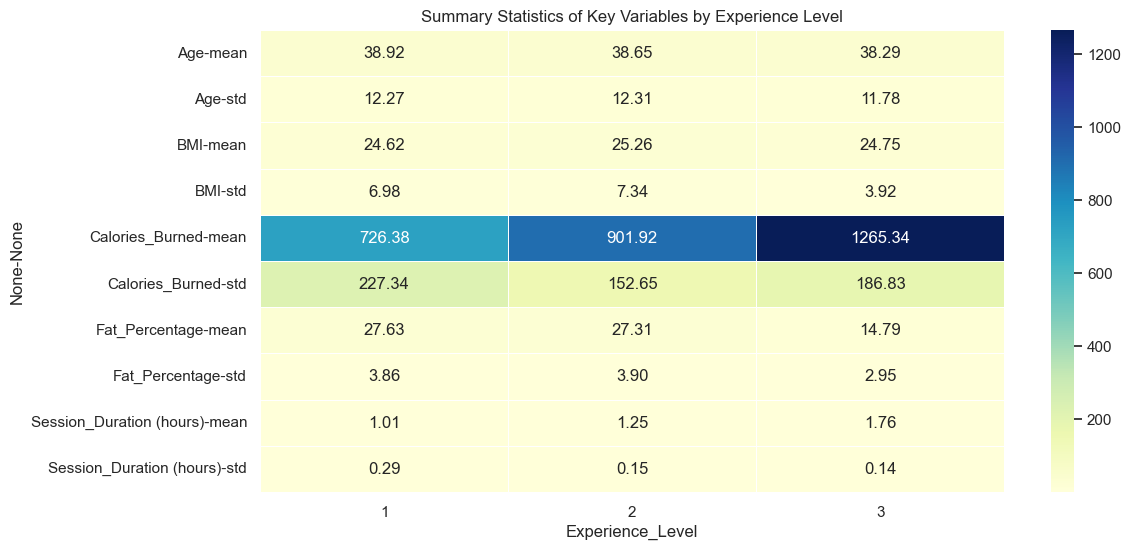

In [55]:
# 9.3. Heatmap for Mean and Standard Deviation:

# Calculate the summary stats
experience_summary = df.groupby('Experience_Level').agg({
    'Age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Calories_Burned': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std'],
    'Session_Duration (hours)': ['mean', 'std']
}).round(2)  # Round for cleaner display

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(experience_summary.T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Summary Statistics of Key Variables by Experience Level")
plt.show()


In [ ]:
# 1.Personal trainer
# 2.Dietary plans
# 3.Outdoor sports
#
#segmentacion porcentaje de grasa alto (dieta, personal trainer) bmi
#poca experiencia (personal trainer)
#poca frecuencia (encuesta plantear clases guiadas, deportes ...)
#fat vs bmi